# Прогнозирование вероятности оттока пользователей для фитнес-центров
Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# Задачи
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
 1. выделить целевые группы клиентов;
 2. предложить меры по снижению оттока;
 3. определить другие особенности взаимодействия с клиентами.

## Изучение данных из файла.
Импортируем библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import itertools
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv', sep=',')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
df.isna().sum()*100/len(df)

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

In [5]:
for row in df: 
    print(df[row].value_counts()) 

1    2041
0    1959
Name: gender, dtype: int64
1    3381
0     619
Name: Near_Location, dtype: int64
0    2053
1    1947
Name: Partner, dtype: int64
0    2766
1    1234
Name: Promo_friends, dtype: int64
1    3614
0     386
Name: Phone, dtype: int64
1     2207
12     960
6      833
Name: Contract_period, dtype: int64
0    2351
1    1649
Name: Group_visits, dtype: int64
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64
135.756722    1
97.623617     1
82.487277     1
17.911351     1
74.882931     1
             ..
163.080276    1
133.640108    1
9.838696      1
134.699410    1
357.046942    1
Name: Avg_additional_charges_total, Length: 4000, dtype: int64
1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0   

In [6]:
df.duplicated().sum()

0

Датасет состоит из 14 столбцов и 4000 строк. Пропущенных значений нет, полных дубликатов нет, нули присутствуют(имеют место быть). Заменить названия столбцов к нижнему регистру.

### Предобработка данных.
Приведите к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Проведите исследовательский анализ данных (EDA)
- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.

- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Сравнивая между собой средние и стандартные значения, разница не большая,выбросов нет. Заметная разница есть в столбцах 'age' и 'avg_additional_charges_total'.

- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

In [9]:
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Больше тех кто остается.

In [10]:
#df.groupby('churn').median().T
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


- gender - почти одинаково и мужчин и женщин,те кто ушел и те кто остался.
- near_location - в двух категориях высокие значения.
- partner - больше тех партнеров клуба,которые остаются.
- promo_friends - больше клиентов по акции "приведи друга" и они чаще остаются.
- phone - много коиентов кто оставил свой номер телефона. В двух категориях высокие значения.
- contract_period - большее число клиентов с абонементом на большее количество месяцев остаются гораздо чаще.
- group_visits - остаются больше клиентов,которые ходят на групповые занятия.
- age - средний возраст примерно одинаковый в двух категориях.
- avg_additional_charges_total - другими услугами пользуются примерно одинаково. Чуть больше тех кто остается.
- month_to_end_contract	- остаются больше клиентов,где остаток абонемента больше.
- lifetime - остаются те кто дольше посещает фитнес.
- avg_class_frequency_total - частота посещений в неделю значения почти одинаковы. Но больше остаются те кто чаще приходит.
- avg_class_frequency_current_month - частота посещения в неделю за предыдущий месяц, больше остается тех кто ходил чаще.

- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [11]:
churn1 = df.query('churn == 1')
churn0 = df.query('churn == 0')

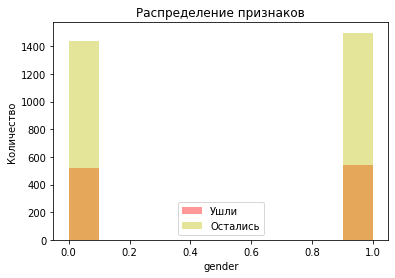

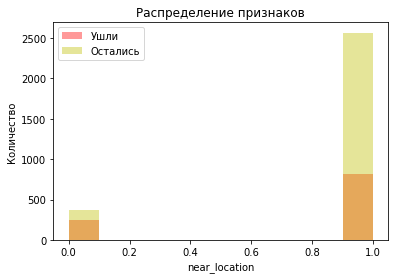

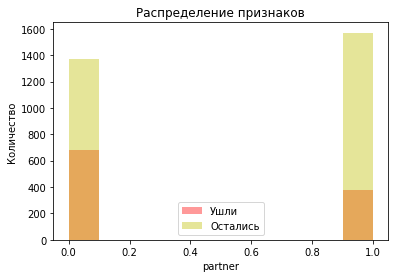

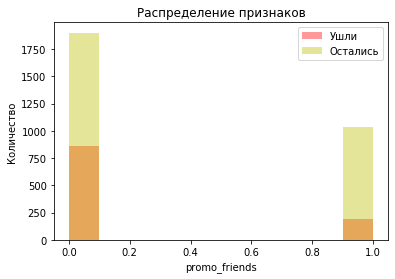

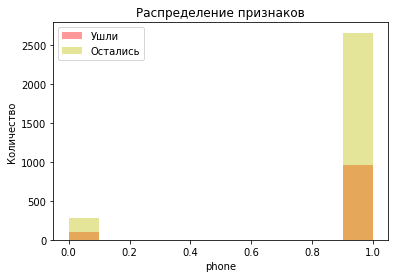

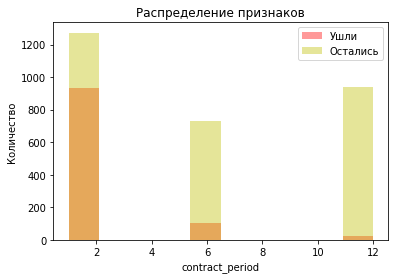

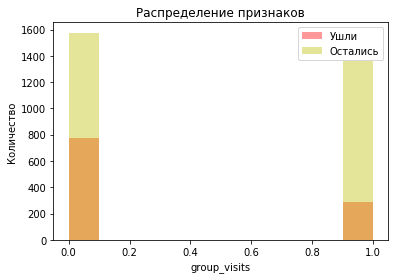

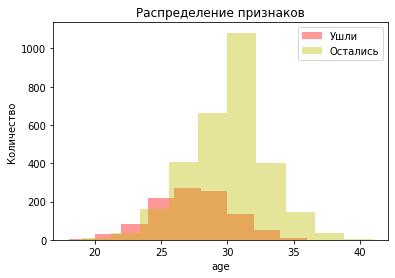

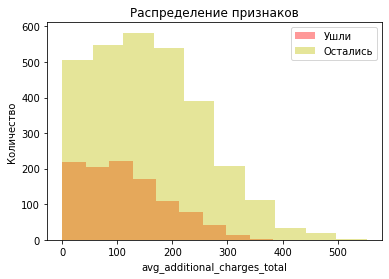

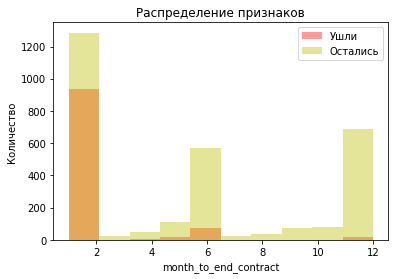

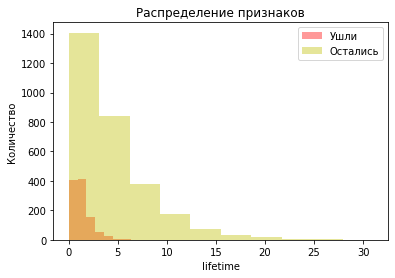

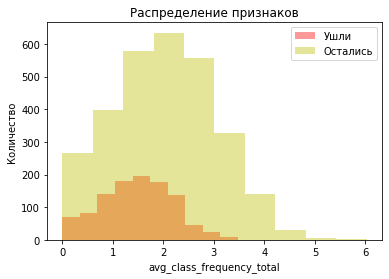

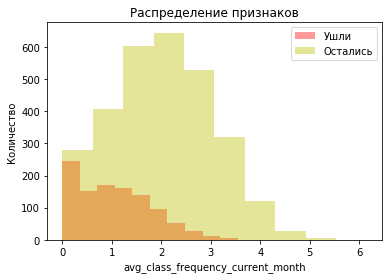

In [12]:
fig, ax = plt.subplots()
for column in df.drop('churn', axis = 1).columns:
    plt.title("Распределение признаков")
    plt.xlabel(column)
    plt.ylabel("Количество")
    sns.distplot(churn1[column], label='Ушли', bins=10, kde=False, color='r')
    sns.distplot(churn0[column], label='Остались', bins=10, kde=False, color='y')
    plt.legend()
    plt.show()

Одинаковые графики gender. По графику Near_Location видно,что больше тех кто живет рядом и уходят больше клиентов-кто расположен дальше. По графику партнеров клуба больше уходят те-кто не сотрудничает с фитнесом. По графику Promo_friends уходят больше-кто не пользовался акцией. По графику Phone видно,что почти все указывают свой номер в анкете и показатели примерно одинаковые. По графику Contract_period видно,что чем дольше продолжительность абонемента,тем больше остаются. По графику Group_visits больше остаются тех-кто ходит на групповые занятия. По графику age можно увидеть,что возраст не влияет на отток. По графику Avg_additional_charges_total можно увидеть,что дополнительные услуги не влияют на отток. По графику Month_to_end_contract видно,что чем больше срок окончания,тем отток меньше. По графику Lifetime видно,что чем меньше месяцев посещения,тем больше отток. По графику Avg_class_frequency_total примерно одинаковые показатели,но больше остаются тех-кто ходит чаще. По графику Avg_class_frequency_current_month видно что остаются те кто ходил чаще на прошлых неделях.

- Постройте матрицу корреляций и отобразите её.

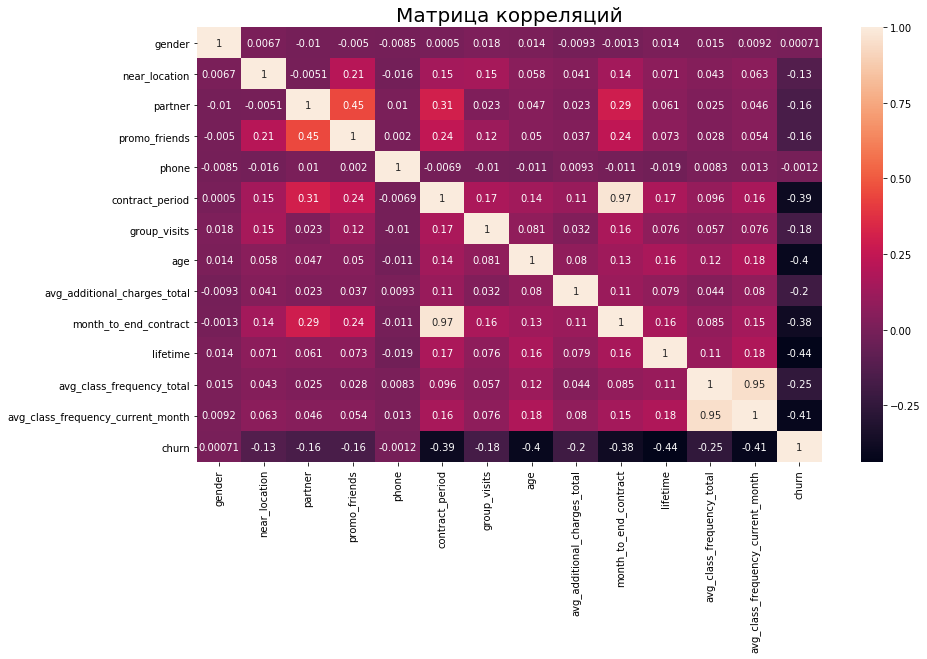

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, square=False)
plt.title('Матрица корреляций', fontsize = 20) 
plt.show()

Видна связь между признаками 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год) и 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента и 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц.Здесь все понятно одно вытекает издругого. Надо удалить один из признаков для,что бы они не мешали при обучении. Так же видна связь между 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента) и Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента),здесь тоже все понятно работают вместе и приглашают колег. Видно не сильную связь между контрактным периодом и партнерами.

##  Постройте модель прогнозирования оттока клиентов
- Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом.
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

In [14]:
df = df.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 375.1 KB


In [15]:
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st =scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [17]:
lr_model = LogisticRegression(random_state=0)

lr_model.fit(X_train_st, y_train)

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [18]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] 

In [19]:
def print_metrics(y_true, y_pred, y_proba, model_name):
    print("Метрики для модели "+model_name)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
#    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
#    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [20]:
print_metrics(y_test, lr_predictions, lr_probabilities, 'логистической регрессии:')

print_metrics(y_test, rf_predictions, rf_probabilities, 'случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.77


Accuracy-доля правильных ответов 0.90 у логической регрессии и 0.90 у случайного леса
Precision-точность 0.79 у логической регрессии и 0.81 у случайного леса
Recall-полнота 0.82 у логической регрессии и 0.75 у случайного леса.
Обе модели достаточно хорошо способны делать прогноз, но метрики логистической регрессии чуть лучше.

## Сделайте кластеризацию клиентов
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
- Стандартизируйте данные.
- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

- Стандартизируйте данные.

In [21]:
X = df.drop('churn', axis=1)

In [22]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

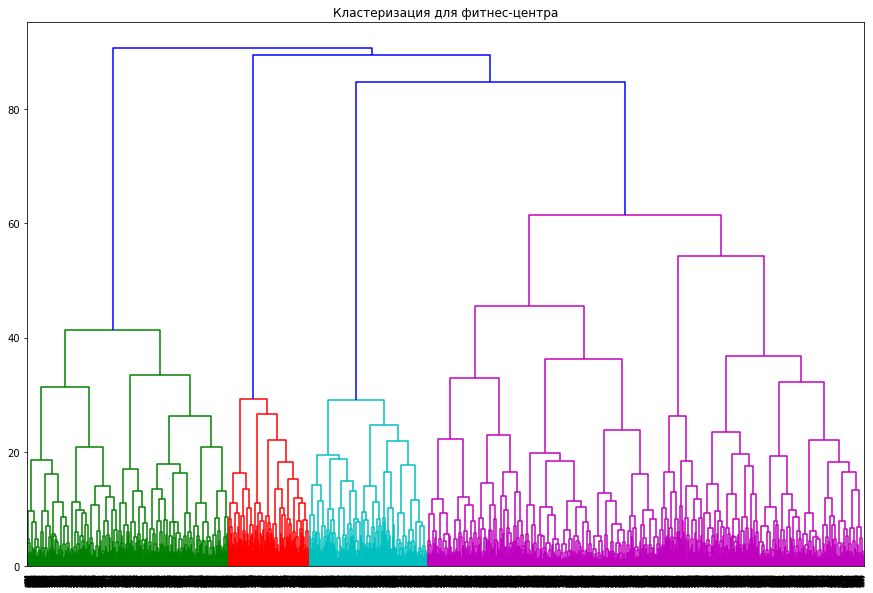

In [23]:
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация для фитнес-центра')
plt.show()

На дендрограмме 4 цвета,значит можно выделить 4 кластера. Но зретельно их 5.

- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [24]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters=5, random_state = 0)
labels = km.fit_predict(X_sc)

- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [25]:
df['cluster'] = labels
df.groupby(['cluster']).mean().T

cluster,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415


In [26]:
df.groupby(['cluster'])['churn'].count()

cluster
0     985
1     558
2    1064
3    1007
4     386
Name: churn, dtype: int64

Больше всего клиентов в кластере №2,0,3. Выделяются по показателям кластеры №0,1,3.

- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

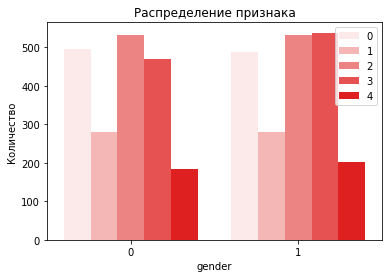

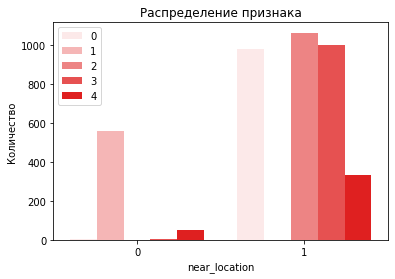

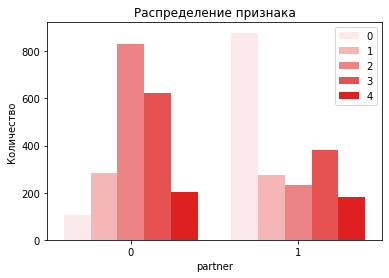

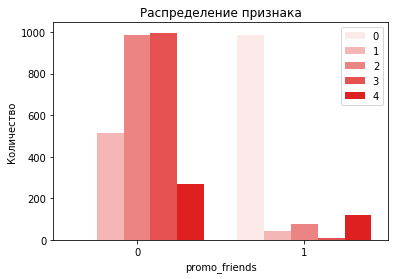

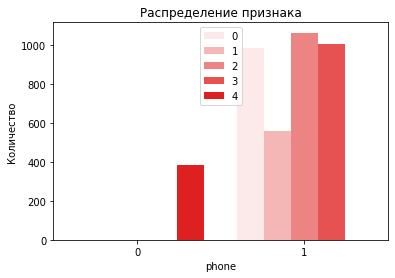

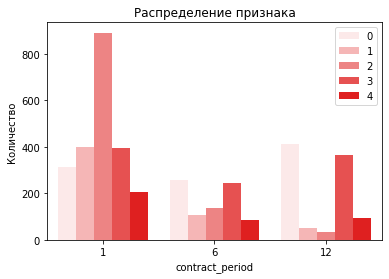

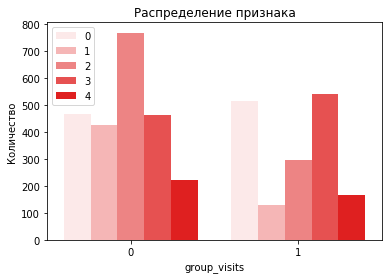

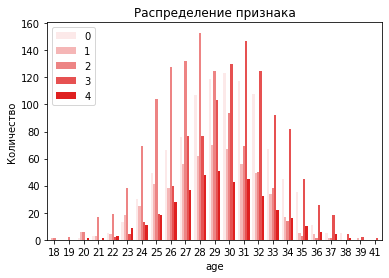

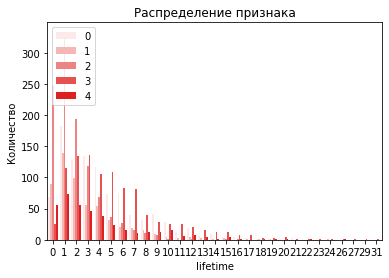

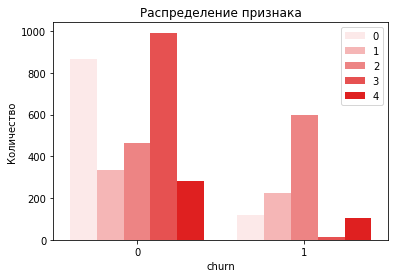

In [27]:
list = ['gender','near_location','partner','promo_friends','phone','contract_period','group_visits','age','lifetime','churn']
fig, ax = plt.subplots()
for column in list:
    plt.title("Распределение признака")
    sns.countplot(data=df, x=column, hue='cluster', color='r')
    plt.xlabel(column)
    plt.ylabel("Количество")
    plt.legend()
    plt.show()

На графиках 'age', 'avg_additional_charges_total', 'avg_class_frequency_current_month', 'lifetime' ничего не разглядеть.
На графике gender больше всего кластеров 0,2,3 и у женщин и у мужчин.
На графике near_location выделяются кластеры 0,2,3 проживающих поблизости и 1,живущих не близко.
На графике partner выделяется 0 партнеры клуба и 2,3 не партнеры.
На графике promo_friends-0 по акции и 1,2 без нее.
На графике phone выделяются кластеры 0,2,3 у кого записан телефон и 4 не записан.
На графике contract_period выделяется 1 месяц кластер 2 и на 12 месяцев кластер 0,3.
На графике group_visits-2 кластер для клиентов,которые не ходят на групповые и 0,3 для групповых.
На графике churn-0,3 для оставшихся и 2 для ушедших.

- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [28]:
df.groupby(['cluster'])['churn'].count()

cluster
0     985
1     558
2    1064
3    1007
4     386
Name: churn, dtype: int64

In [29]:
cluster_churn = df.groupby('cluster')['churn'].mean().reset_index()
cluster_churn.sort_values(by='churn', ascending=False).reset_index(drop=True).round(2)

,cluster,churn
0,2,0.56
1,1,0.40
2,4,0.27
3,0,0.12
4,3,0.01


Самый большой отток у кластера №2,потом №1 и №4. Надежные кластеры №0 и №3.

## Вывод

# Фитнес-центром пользуются:
- в равных долях и мужчины и женщины;
- большое количество партнеров клуба;
- много клиентов по акции "приведи друга";
- клиенты,которые ходят на групповые занятия;
- средний возраст 26-29 лет;
- клиенты,которые купили абонимент;
# Модель прогнозирования оттока клиентов:
- Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82
- Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75
Обе модели достаточно хорошо способны делать прогноз, но метрики логистической регрессии чуть лучше.
# Рекомендации:
- Нужно обратить внимание на кластер №2,потому что там большое количество клиентов и самый большой уход;
- Нужно обратить внимание на новых клиентов,т.к. у них больший отток;
- Сделать акции на продление абонементов;
- Сделать акции для проживающих или работающих в районе, где находится фитнес-центр или сделать больше рекламы.